In [86]:
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.colors as mcolors

import json
import folium

import squarify

In [87]:
from sklearn.metrics.pairwise import haversine_distances
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import cluster_optics_dbscan
import matplotlib.gridspec as gridspec
from sklearn import datasets

from sklearn.cluster import KMeans
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans

In [88]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [89]:
df = pd.read_excel('./숙소위치기반_교통_관광_통계정보_final.xlsx')

In [90]:
df

,이름,종류,평점,숙박가격,도보시간,인기테그,별점 높은순 후기,별점 낮은순 후기,주소,객실수,...,지하철역_평균거리(1km내),교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내)
0,앰배서더 서울 풀만 호텔,프리미엄호텔,4.8,250000,동대입구역 1번출구 250m,"['주차가능', '야외수영장', '수영장', '와이파이', '사우나', '클럽라운지...","['시설에 비해 가격도 저렴합니당', '너무너무 깨끗하고 쾌적합니다.', '룸서비스...",[],서울특별시 중구 동호로 287,269,...,0.72,65461.18,66068.77,131529.95,6,6,0.61,0.82,0.57,0.79
1,글래드 여의도,4성급,4.7,200640,국회의사당역 4번출구 도보 1분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '바', ...","['정말 좋아요 말이 필요 없어요!', '컨디션은 항상 너무 좋네요! 최저가로 저렴...","['데이유즈 쪼매난 글씨에 속아 숙박전환 추가 55천원내고 아주 식겁시키네요', '...",서울특별시 영등포구 의사당대로 16,319,...,0.62,41877.82,44699.42,86577.24,9,2,0.19,0.63,0.75,0.87
2,글래드 마포,4성급,4.8,143000,공덕역 바로 앞,"['주차가능', '와이파이', '객실금연', '피트니스', '어메니티', '비즈니스']","['너무 좋았습니다! 다음에 재방문할게요~~!', '자주 놀러가는 곳이에요', '완...","['난방이 안되는 호텔춥다고 했더니 체크인시 얘기했는데 어쩌라는 호텔', '지방에 ...",서울특별시 마포구 마포대로 92,378,...,0.42,20412.48,20203.94,40616.42,3,3,0.70,0.79,0.18,0.23
3,더 리프 사당,일반호텔,4.3,265000,서울특별시 관악구 남현 1길 66 사당역 5번 출구 도보 1분,"['스파/월풀/욕조', '와이파이', '객실금연', '24시간데스크', '비즈니스'...","['너무좋았어용', '너무 친절하시고 시설이 이쁘고 깔끔해서 좋았어요', '기념일 ...",[],서울특별시 관악구 남현1길 66,한국어,...,0.12,50042.49,51264.60,101307.08,9,3,0.16,0.71,0.49,0.81
4,나인트리 프리미어 로카우스 호텔 서울 용산,일반호텔,4.7,158000,용산역 1번 출구 도보 3분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '연회장'...","['호캉스하기 좋아요', '좋아용 이용 추천', '어린 아이들이 놀기 좋은 적당한 ...",[],서울특별시 용산구 한강대로23길 25,274,...,0.53,23108.84,23304.33,46413.18,15,7,0.13,0.50,0.14,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,서울 인사동알게스트하우스,게스트하우스,4.8,60000,숙소 위치보기,['와이파이'],"['사장님너무친절하시고따뜻방이라 너무좋앗습니다', '깨끗하고 자취방 같이 아늑합니다...",[],서울특별시 종로구 수표로28길 12-3,NaN,...,0.55,79574.44,78905.40,158479.84,14,3,0.22,0.66,0.38,0.62
1211,서울 룩스게스트하우스,게스트하우스,3.6,57000,숙소 위치보기,['와이파이'],"['수건 많음, 화장실은 살짝 냄새남, 잠 자기에는 편했음, 이불이 푹신했음', '...",[],서울특별시 마포구 와우산로 156 5층,NaN,...,0.58,40123.87,40226.95,80350.82,24,8,0.04,0.58,0.28,0.48
1212,서울 Bottlehouse펜션,펜션/호스텔,4.0,108000,숙소 위치보기,"['와이파이', '독채객실']","['좋았어요!!!', '??숙소는 역근처 건물 3층에 위치하고 있어요. 찾아오기 어...",[],서울특별시 구로구 경인로25길 16 301호,NaN,...,0.31,7937.43,7486.39,15423.81,2,2,0.26,0.45,0.09,0.43
1213,서울 종로준오호텔펜션,펜션/호스텔,5.0,90000,숙소 위치보기,"['와이파이', '상비약']",['숙소 깔끔하고 인테리어도 분위기 있어요! 특히 화장실 청소 잘되있습니다! 사장님...,[],서울특별시 종로구 인사동16길 6,NaN,...,0.66,75400.56,73681.34,149081.91,23,4,0.09,0.60,0.09,0.70


In [91]:
# make kmeans clustring.
# variate n_clusters as I want
X = df[['위도', '경도']].values
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
df['label'] = labels
df

c:\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,이름,종류,평점,숙박가격,도보시간,인기테그,별점 높은순 후기,별점 낮은순 후기,주소,객실수,...,교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내),label
0,앰배서더 서울 풀만 호텔,프리미엄호텔,4.8,250000,동대입구역 1번출구 250m,"['주차가능', '야외수영장', '수영장', '와이파이', '사우나', '클럽라운지...","['시설에 비해 가격도 저렴합니당', '너무너무 깨끗하고 쾌적합니다.', '룸서비스...",[],서울특별시 중구 동호로 287,269,...,65461.18,66068.77,131529.95,6,6,0.61,0.82,0.57,0.79,8
1,글래드 여의도,4성급,4.7,200640,국회의사당역 4번출구 도보 1분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '바', ...","['정말 좋아요 말이 필요 없어요!', '컨디션은 항상 너무 좋네요! 최저가로 저렴...","['데이유즈 쪼매난 글씨에 속아 숙박전환 추가 55천원내고 아주 식겁시키네요', '...",서울특별시 영등포구 의사당대로 16,319,...,41877.82,44699.42,86577.24,9,2,0.19,0.63,0.75,0.87,5
2,글래드 마포,4성급,4.8,143000,공덕역 바로 앞,"['주차가능', '와이파이', '객실금연', '피트니스', '어메니티', '비즈니스']","['너무 좋았습니다! 다음에 재방문할게요~~!', '자주 놀러가는 곳이에요', '완...","['난방이 안되는 호텔춥다고 했더니 체크인시 얘기했는데 어쩌라는 호텔', '지방에 ...",서울특별시 마포구 마포대로 92,378,...,20412.48,20203.94,40616.42,3,3,0.70,0.79,0.18,0.23,7
3,더 리프 사당,일반호텔,4.3,265000,서울특별시 관악구 남현 1길 66 사당역 5번 출구 도보 1분,"['스파/월풀/욕조', '와이파이', '객실금연', '24시간데스크', '비즈니스'...","['너무좋았어용', '너무 친절하시고 시설이 이쁘고 깔끔해서 좋았어요', '기념일 ...",[],서울특별시 관악구 남현1길 66,한국어,...,50042.49,51264.60,101307.08,9,3,0.16,0.71,0.49,0.81,13
4,나인트리 프리미어 로카우스 호텔 서울 용산,일반호텔,4.7,158000,용산역 1번 출구 도보 3분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '연회장'...","['호캉스하기 좋아요', '좋아용 이용 추천', '어린 아이들이 놀기 좋은 적당한 ...",[],서울특별시 용산구 한강대로23길 25,274,...,23108.84,23304.33,46413.18,15,7,0.13,0.50,0.14,0.43,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,서울 인사동알게스트하우스,게스트하우스,4.8,60000,숙소 위치보기,['와이파이'],"['사장님너무친절하시고따뜻방이라 너무좋앗습니다', '깨끗하고 자취방 같이 아늑합니다...",[],서울특별시 종로구 수표로28길 12-3,NaN,...,79574.44,78905.40,158479.84,14,3,0.22,0.66,0.38,0.62,3
1211,서울 룩스게스트하우스,게스트하우스,3.6,57000,숙소 위치보기,['와이파이'],"['수건 많음, 화장실은 살짝 냄새남, 잠 자기에는 편했음, 이불이 푹신했음', '...",[],서울특별시 마포구 와우산로 156 5층,NaN,...,40123.87,40226.95,80350.82,24,8,0.04,0.58,0.28,0.48,7
1212,서울 Bottlehouse펜션,펜션/호스텔,4.0,108000,숙소 위치보기,"['와이파이', '독채객실']","['좋았어요!!!', '??숙소는 역근처 건물 3층에 위치하고 있어요. 찾아오기 어...",[],서울특별시 구로구 경인로25길 16 301호,NaN,...,7937.43,7486.39,15423.81,2,2,0.26,0.45,0.09,0.43,0
1213,서울 종로준오호텔펜션,펜션/호스텔,5.0,90000,숙소 위치보기,"['와이파이', '상비약']",['숙소 깔끔하고 인테리어도 분위기 있어요! 특히 화장실 청소 잘되있습니다! 사장님...,[],서울특별시 종로구 인사동16길 6,NaN,...,75400.56,73681.34,149081.91,23,4,0.09,0.60,0.09,0.70,3


In [92]:
# # Generate a list of labels
# labels = np.arange(n_clusters)

# # Choose a colormap
# cmap = plt.get_cmap('tab20')

# # Generate a list of colors based on the labels
# colors = [cmap(i) for i in labels % cmap.N]

# # Print the colors
# print(len(colors))

In [93]:
# calculate density of each clustering group
densities = []
for i in range(n_clusters):
    group = X[kmeans.labels_ == i]
    density = gaussian_kde(group.T)(group.T)
    densities.append(np.mean(density))
    print(f'this is {i}_th density:{i}:',densities[i])


this is 0_th density:0: 442.5285862997727
this is 1_th density:1: 1968.2937447909665
this is 2_th density:2: 897.9304866372083
this is 3_th density:3: 1874.1530662144216
this is 4_th density:4: 1199.7323476401189
this is 5_th density:5: 1450.9952242028273
this is 6_th density:6: 2913.5730366050166
this is 7_th density:7: 1984.881355034026
this is 8_th density:8: 957.4134768971321
this is 9_th density:9: 806.4116171707556
this is 10_th density:10: 3026.9765226380537
this is 11_th density:11: 1497.5234046629057
this is 12_th density:12: 2094.6014602041596
this is 13_th density:13: 1310.9021209112734
this is 14_th density:14: 997.2974379021394


In [94]:
df['label'].unique()

array([ 8,  5,  7, 13,  2,  9, 11,  3,  0, 12,  1,  6, 10,  4, 14])

In [138]:
#colors = ['#E31B25', '#BCBDBD', '#F9D72A', '#26A59A', '#529FCD', '#FABD9E', '#FDBF6F', '#7FC97F', '#CAB2D6', '#FFFFB3']

colors = ['#E31B25', '#BCBDBD', '#F9D72A', '#26A59A', '#529FCD', '#FABD9E', '#FDBF6F', '#7FC97F', '#CAB2D6', '#FFFFB3',
          '#FF7F00', '#FB9A99', '#33A02C', '#B2DF8A', '#1F78B4']

In [96]:
seoul_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

In [115]:
df[(df['label'] == 7) & (df['종류'] == '모텔')]

,이름,종류,평점,숙박가격,도보시간,인기테그,별점 높은순 후기,별점 낮은순 후기,주소,객실수,...,교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내),label
573,노량진 N.Stay,모텔,4.8,75102,숙소 위치보기,"['무료영화(OTT)', '와이파이', 'VOD', '24시간데스크', '비즈니스']","['좋아요~~~', '깨끗하고 좋아요', '최고입니다', '가성비갑 강추합니다', ...",['이날도 가고 29일날도 예약을 했지만 프론트에 사람이 없어서 30분동안 기달리다...,서울특별시 동작구 노량진로 198 (노량진동),26,...,17765.09,17767.38,35532.47,12,3,0.15,0.62,0.61,0.83,7
741,신촌 월 (月),모텔,4.6,100000,이대역 1번출구 도보 3분,"['주차가능', '수영장', '객실내PC', '무료영화(OTT)', '노래방', '...","['사장님 너무 친절하시고 깨끗하고 좋았어요!', '잘쉬다갑니다', '잘쉬다갑니다'...","['주말 가격 대비 비추합니다', '안녕하세요, 짱멋취한다님최고의 평점과 좋은 리뷰...",서울특별시 서대문구 연세로2길 101-10 (대현동),40,...,40853.87,39654.19,80508.05,17,4,0.24,0.55,0.53,0.66,7
742,신촌 레츠,모텔,4.7,90000,??신촌역 4번출구도보3분??#깔끔#모던,"['스파/월풀/욕조', '주차가능', '커플PC', '객실내PC', '무료영화(OT...","['돟습니다.', '감사합니다♥', '사장님 친절하시고 깔끔하고 최고에요', '감사...","['권리침해 신고로 인하여 임시 차단되었습니다.', '어제 체크인하고 씻고 침대에 ...",서울특별시 서대문구 신촌로 125-5 (창천동),30,...,34806.11,34138.18,68944.29,18,4,0.05,0.56,0.28,0.39,7
743,신촌 라싸,모텔,4.1,100000,신촌역 3번출구 도보 3분,"['주차가능', '무료영화(OTT)', '와이파이', 'VOD', '24시간데스크']","['안 망하고 오래가줘요', '아주좋아유', '깨끗했어요', '저희 라싸호텔을 이용...","['1점이 적당합니다', '직원인지 사장인지 너무 불친절해요ㅡㅡ룸 컨디션은 외관이랑...",서울 서대문구 연세로2가길 3 (창천동),41,...,29091.80,28179.41,57271.21,18,7,0.18,0.54,0.09,0.54,7
744,신촌 제이드,모텔,4.6,100000,신촌역 도보5분,"['스파/월풀/욕조', '무료영화(OTT)', '노천탕', '와이파이', '트윈베드...","['깔끔하고 만족스러워요 지은지 별로 안된 건물같았어요!', '아주좋았ㅅㄷㅂ니다',...","['침대에 바퀴벌레 시체 잇엇음;;;', '들어가자마자 담배냄새 진짜 심하고 복도소...",서울 서대문구 연세로2가길 12 (창천동),29,...,30936.92,30159.98,61096.90,19,4,0.19,0.55,0.10,0.23,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,용산 스카이 호텔,모텔,4.4,75102,"용산역1번, 신용산역3번 출구","['주차가능', '와이파이', 'VOD', '24시간데스크', '비즈니스']","['편안한휴식', '좋았어요!', '평안항휴식', '펻안한휴식', '매우좋아용', ...","['침대 옆 창문 잠궈도 찬바람 새어들어오고, 하수구 냄새 때문에 화장실 가기 싫을...",서울특별시 용산구 한강대로7길 9-5(한강로3가),18,...,28826.24,28686.99,57513.23,16,6,0.16,0.67,0.58,0.75,7
947,용산역 WO,모텔,4.4,125000,숙소 위치보기,"['주차가능', '와이파이', '트윈베드', 'VOD', '어메니티', '24시간데...","['조았습니다', '무난한 모텔. 가성비 좋아요간단한 조식(커피 등)이라도 있으면 ...","['불친절함마', '용산역 근처에 숙소가 얼마 없어서 예약했는데\r가격 비싸고 무인...",서울특별시 용산구 한강대로7길 9,22,...,28826.24,28686.99,57513.23,15,6,0.15,0.65,0.56,0.73,7
953,용산 샾 호텔,모텔,3.3,75102,용산역 3번출구 방향,"['와이파이', '어메니티', '24시간데스크']","['딱이에요~~~~', '저렴한 가격에 비해 상당히 괜찮!', '전기장판 따뜻해요 ...","['냄새가나요', '장사 그렇게 하시면 안됩니다', '방음이 안돼 소음때문에 잠도 ...",서울특별시 용산구 원효로56길 21-3 (원효로2가),15,...,21329.03,20821.67,42150.70,11,7,0.15,0.63,0.24,0.47,7
966,용산 평안모텔,모텔,3.4,55000,1호선용산역3출구도보7분거리,"['와이파이', 'VOD', '어메니티', '24시간데스크', '비즈니스']","['급하게 예약했는데 좋았습니더', '가성비 좋은 숙소예여! 숙소입구도 예쁘고 하룻...",[],서울특별시 용산구 원효로41길 47-4,11,...,13875.01,13284.23,27159.24,9,8,0.32,0.70,0.04,0.63,7


In [112]:
df['종류'].unique()

array(['프리미엄호텔', '4성급', '일반호텔', '3성급', '5성급', '2성급', '레지던스', '1성급',
       '전통호텔', '모텔', '게스트하우스', '펜션/호스텔'], dtype=object)

In [98]:
# dfs=[]
# 10 should match in clustering code.
for i in range(n_clusters):   
    print(i)
    dfs_i = df[(df['label'] == i)]
    print(densities[i], colors[i])
    for name, lat, lng in zip(dfs_i.index, dfs_i.위도, dfs_i.경도):
        folium.CircleMarker([lat, lng], radius=7, color=colors[i],
                            fill=True, fill_color=colors[i],
                            fill_opacity=0.1,
                            popup=i).add_to(seoul_map)

0
442.5285862997727 #E31B25
1
1968.2937447909665 #BCBDBD
2
897.9304866372083 #F9D72A
3
1874.1530662144216 #26A59A
4
1199.7323476401189 #529FCD
5
1450.9952242028273 #FABD9E
6
2913.5730366050166 #FDBF6F
7
1984.881355034026 #7FC97F
8
957.4134768971321 #CAB2D6
9
806.4116171707556 #FFFFB3
10
3026.9765226380537 #FF7F00
11
1497.5234046629057 #FB9A99
12
2094.6014602041596 #33A02C
13
1310.9021209112734 #B2DF8A
14
997.2974379021394 #1F78B4


In [99]:
seoul_map

In [116]:
densities

[442.5285862997727,
 1968.2937447909665,
 897.9304866372083,
 1874.1530662144216,
 1199.7323476401189,
 1450.9952242028273,
 2913.5730366050166,
 1984.881355034026,
 957.4134768971321,
 806.4116171707556,
 3026.9765226380537,
 1497.5234046629057,
 2094.6014602041596,
 1310.9021209112734,
 997.2974379021394]

In [120]:
x =np.arange(n_clusters).tolist()
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [125]:
df_plt = pd.DataFrame({'label': x, 'density': densities})
df_plt

,label,density
0,0,442.528586
1,1,1968.293745
2,2,897.930487
3,3,1874.153066
4,4,1199.732348
5,5,1450.995224
6,6,2913.573037
7,7,1984.881355
8,8,957.413477
9,9,806.411617


In [133]:
df_plt = df_plt.sort_values('density', ascending=False)
df_plt

,label,density
10,10,3026.976523
6,6,2913.573037
12,12,2094.601460
7,7,1984.881355
1,1,1968.293745
3,3,1874.153066
11,11,1497.523405
5,5,1450.995224
13,13,1310.902121
4,4,1199.732348


In [145]:
df_plt['label'] = df_plt['label'].astype('str')

In [146]:
df_plt['label']

10    10
6      6
12    12
7      7
1      1
3      3
11    11
5      5
13    13
4      4
14    14
8      8
2      2
9      9
0      0
Name: label, dtype: object

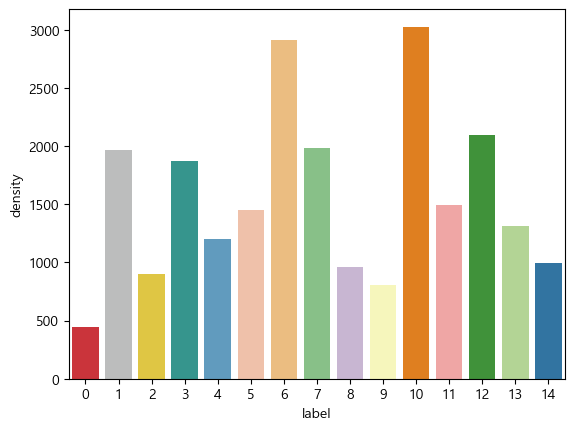

In [147]:
sns.barplot(x='label', y='density', data=df_plt_sorted, palette=colors)
plt.show()